In [2]:
import os
import ast
import networkx as nx
from copy import deepcopy

In [3]:
### open Hamiltonian data ###

working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir) # gets directory where running python file is!

data_dir = os.path.join(parent_dir, 'Molecular_Hamiltonian_data')
hamiltonian_data = os.path.join(data_dir, 'hamiltonians.txt')

In [4]:
with open(hamiltonian_data, 'r') as input_file:
    hamiltonians = ast.literal_eval(input_file.read())

for key in hamiltonians.keys():
    print(f"{key: <25}     n_qubits:  {hamiltonians[key][1]:<5.0f}")

H2-S1_STO-3G_singlet          n_qubits:  18   
C1-O1_STO-3G_singlet          n_qubits:  16   
H1-Cl1_STO-3G_singlet         n_qubits:  16   
H1-Na1_STO-3G_singlet         n_qubits:  16   
H2-Mg1_STO-3G_singlet         n_qubits:  17   
H1-F1_3-21G_singlet           n_qubits:  18   
H1-Li1_3-21G_singlet          n_qubits:  18   
Be1_STO-3G_singlet            n_qubits:  5    
H1-F1_STO-3G_singlet          n_qubits:  8    
H1-Li1_STO-3G_singlet         n_qubits:  8    
Ar1_STO-3G_singlet            n_qubits:  13   
F2_STO-3G_singlet             n_qubits:  15   
H1-O1_STO-3G_singlet          n_qubits:  8    
H2-Be1_STO-3G_singlet         n_qubits:  9    
H2-O1_STO-3G_singlet          n_qubits:  10   
H2_3-21G_singlet              n_qubits:  5    
H2_6-31G_singlet              n_qubits:  5    
H3-N1_STO-3G_singlet          n_qubits:  13   
H4-C1_STO-3G_singlet          n_qubits:  14   
Mg1_STO-3G_singlet            n_qubits:  13   
N2_STO-3G_singlet             n_qubits:  15   
Ne1_STO-3G_si

In [5]:
molecule_key = 'H1-Li1_STO-3G_singlet'
transformation, N_qubits, Hamilt_dictionary, _ ,_, _ = hamiltonians['H1-Li1_STO-3G_singlet']

# 1. Get OpenFermion representation of Hamiltonian

In [6]:
from quchem.Misc_functions.conversion_scripts import Get_Openfermion_Hamiltonian

openFermion_H = Get_Openfermion_Hamiltonian(Hamilt_dictionary)
openFermion_H

-5.001425458221718 [] +
0.004877026695939432 [X0] +
0.008434569756845523 [X0 X1] +
0.003463638100879079 [X0 Z1 X2 Z3 Z5 Z7] +
-0.0034636381008790766 [X0 Z1 Z2 X3 Z5 Z7] +
0.004882949606014626 [X0 Z1 Z2 X4 Z5 Z7] +
-0.004882949606014626 [X0 Z1 Z2 Z4 X5 Z7] +
-0.0015024523676698824 [X0 Z1 Z2 Z4 X6 Z7] +
-0.004877026695939432 [X0 Z1 Z2 Z4 Z6] +
0.0015024523676698824 [X0 Z1 Z2 Z4 Z6 X7] +
-0.004877026695939432 [X0 Z1 Z3 Z5 Z7] +
-0.003463638100879079 [X0 X2] +
0.010327309992822217 [X0 X2 X3] +
0.004803863260481915 [X0 X2 Z3 Z4 X5] +
-0.0025611654019874314 [X0 X2 Z3 Z4 Z5 Z6 X7] +
-0.010327309992822217 [X0 Y2 Y3] +
-0.004803863260481915 [X0 Y2 Z3 Z4 Y5] +
0.0025611654019874314 [X0 Y2 Z3 Z4 Z5 Z6 Y7] +
-0.004882949606014626 [X0 Z2 Z3 X4] +
0.0015024523676698824 [X0 Z2 Z3 Z4 Z5 X6] +
0.004877026695939432 [X0 Z2 Z3 Z4 Z5 Z6 Z7] +
-0.0048038632604819175 [X0 X3 X4] +
0.0025611654019874314 [X0 X3 Z4 Z5 X6] +
0.0034636381008790766 [X0 X3 Z4 Z5 Z6 Z7] +
0.0048038632604819175 [X0 Y3 Y4] +
-0.0025611

# 2. Get cliques defined by commutativity 


In [7]:
from quchem.Unitary_Partitioning.Graph import Vector_QubitHamiltonian

In [12]:
n_qubits = 8
clique_relation = 'C'

Hamilt_vector = Vector_QubitHamiltonian(openFermion_H, n_qubits)

adj_matrix = Hamilt_vector.Get_adj_mat(clique_relation)
node_conv_dict = {ind: Pvec.QubitOp for ind, Pvec in Hamilt_vector.Qubit_H_vec_ind_to_Pvec.items()}

Graph = nx.from_numpy_matrix(adj_matrix)
Complement_Graph = nx.complement(Graph)

In [13]:
max_cliques = nx.algorithms.clique.find_cliques(Complement_Graph)
first_maximal = next(max_cliques)
first_maximal

[0]

In [14]:
next(max_cliques)

[1, 512, 132, 419, 472, 64, 220, 12]

In [16]:
# xxx = nx.algorithms.approximation.clique.max_clique(Complement_Graph)

AttributeError: module 'networkx.algorithms' has no attribute 'approximation'

<558x16 sparse matrix of type '<class 'numpy.int64'>'
	with 3058 stored elements in List of Lists format>

In [15]:
Commutes_vector(Hamilt_vector.binary_mat[0], Hamilt_vector.binary_mat[1], N_qubits)

NameError: name 'Commutes_vector' is not defined

In [16]:
from quchem.Unitary_Partitioning.Graph import Clique_cover_Hamiltonian

commutativity_flag = 'C' ## <- defines relationship between sets!!!
Graph_colouring_strategy='largest_first'


Commuting_sets = Clique_cover_Hamiltonian(openFermion_H, 
                                                     N_qubits, 
                                                     commutativity_flag, 
                                                     Graph_colouring_strategy)
Commuting_sets

{0: [-0.0005602367691690761 [X7],
  0.01115672755331298 [X6],
  -0.02906042590649248 [X5 X7],
  9.308532583860961e-05 [X5 X6],
  0.001783048244458605 [X4 X6],
  0.001407793599187085 [X4 X5 X7],
  0.009009667437306818 [X3],
  0.011777126885190555 [X3 X5],
  0.007785194491376199 [X3 X4],
  -0.002876078434933135 [X3 X4 X6 X7],
  -0.010904255360997208 [X2],
  -0.0003501492223109143 [X2 X6 X7],
  -0.0015766376238054121 [X2 X4],
  -0.008401378470806105 [X2 X4 X5],
  0.0011230560926772924 [X2 X3 X7],
  5.692635189682806e-05 [X2 X3 X5 X6],
  0.004877026695939432 [X1],
  -0.0015024523676698824 [X1 X7],
  0.0024547625653344985 [X1 X6 X7],
  0.0018915758280655941 [X1 X5 X6],
  0.00598108191541999 [X1 X4 X5],
  -0.0048038632604819175 [X1 X3 X4],
  -0.003463638100879079 [X1 X2],
  0.010327309992822217 [X1 X2 X3],
  0.004877026695939432 [X0],
  -0.0015024523676698824 [X0 X7],
  0.0024547625653344985 [X0 X6 X7],
  0.0018915758280655941 [X0 X5 X6],
  0.00598108191541999 [X0 X4 X5],
  -0.00480386326048

In [17]:
key_larg, largest_C_set = max(Commuting_sets.items(), key=lambda x:len(x[1])) 

In [18]:
sorted_cliques = sorted(list(Commuting_sets.values()), key=lambda x:len(x))

In [19]:
sorted_cliques[-1] == largest_C_set

True

In [23]:
largest_C_set

In [24]:
import sys
sys.path.append( '../Projects/CS_VQE/' )

In [25]:
import cs_vqe as c

In [26]:
nonH_guesses = c.greedy_dfs(Hamilt_dictionary, 10, criterion='weight')

nonH = max(nonH_guesses, key=lambda x:len(x)) # largest nonCon part found by dfs alg
len(nonH)

74

In [20]:
Hamilt_vector = Vector_QubitHamiltonian(openFermion_H, n_qubits)
Hamilt_binary_matrix = Hamilt_vector.binary_mat
Hamilt_binary_matrix

<558x16 sparse matrix of type '<class 'numpy.int64'>'
	with 3058 stored elements in List of Lists format>

In [21]:
adjacency_mat = Hamilt_vector.Get_adj_mat('C')
adjacency_mat.shape

(558, 558)

0.0

In [180]:
a=1
b=2

A = Hamilt_binary_matrix[b]
B =Hamilt_binary_matrix[a]

print(adjacency_mat[a,b])
AB = Commutes_vector(A, B, N_qubits)
AB

0.0


False

In [169]:
list_of_terms = list(zip(range(len(list(openFermion_H))), list(openFermion_H)))

sorted_terms = sorted(list_of_terms, key=lambda x: list(x[1].terms.values())[0])
indices_by_weight, _ = zip(*sorted_terms)

In [173]:
from tqdm.notebook import tqdm
import random

N_nodes = len(Hamilt_dictionary)

# list_ind = list(range(N_nodes))
# random.shuffle(list_ind) # <-- randomly shuffle list

list_ind = indices_by_weight

# for i in range(N_nodes):
del_terms = []
for ind_i in tqdm(range(N_nodes)):
    i=list_ind[ind_i]
# for ind_i, i in tqdm(enumerate(list_ind)):
    for ind_j, j in enumerate(list_ind[ind_i:]): #range(N_nodes):
        for k in list_ind[(ind_i+ind_j):]:#range(j, list_ind):
            if i in del_terms:
                continue
            elif j in del_terms:
                continue
            elif k in del_terms:
                continue
            else:
                IJ = adjacency_mat[i,j]
                JK = adjacency_mat[j, k]
                IK = not adjacency_mat[i, k]

                if IJ and JK and IK:
                    i_con = sum(adjacency_mat[i,:])
                    j_con = sum(adjacency_mat[j,:])
                    k_con = sum(adjacency_mat[k,:])
                    
#                     largest_connect = max([(i_con,i), (j_con,j), (k_con, k)], key=lambda x: x[0])
#                     del_terms.append(largest_connect[1])
                    if (i_con>j_con) and (i_con>k_con):
                        del_terms.append(i)
                    elif (j_con>i_con) and (j_con>k_con):
                        del_terms.append(j)
                    else:
                        del_terms.append(k)

In [174]:
len(Hamilt_dictionary) - len(del_terms)

19

In [175]:
len(del_terms)

539

In [ ]:
nonCon_H = {}
for P in nonH:
    if P in Hamilt_dictionary.keys():
        nonCon_H[P]=Hamilt_dictionary[P]
c.contextualQ_ham(nonCon_H)    

In [ ]:
nonCon_H

In [ ]:
from quchem.Misc_functions.conversion_scripts import Openfermion_to_dict
from functools import reduce

Q_op_commuting = reduce(lambda x,y: x+y, largest_C_set)
N_qubits = len(list(nonCon_H.keys())[0])

commuting_dict = Openfermion_to_dict(Q_op_commuting, N_qubits)

In [ ]:
len(commuting_dict)

In [ ]:
H_full = Hamilt_dictionary

H_remaining = {}
for term in Hamilt_dictionary:
    if term in commuting_dict:
        continue
    else:
        H_remaining[term]=Hamilt_dictionary[term]

In [ ]:
c.contextualQ_ham(commuting_dict)

In [ ]:
c.contextualQ(H_remaining)

In [ ]:
from datetime import datetime
from datetime import timedelta

cutoff = 10 # seconds

start_time = datetime.now()
delta = timedelta(seconds=cutoff)

H_noncon_Graph = deepcopy(commuting_dict)

key_list_by_weight = [k for k, v in sorted(H_remaining.items(), key=lambda item: -item[1])]
while (datetime.now()-start_time) and len(key_list_by_weight)>0:
    
    
    active_key = key_list_by_weight.pop()
    H_noncon_Graph[active_key] = H_remaining[active_key]
    if c.contextualQ_ham(H_noncon_Graph):
        del H_noncon_Graph[active_key]

In [ ]:
H_noncon_Graph

In [ ]:
def greedy_dfs(ham,cutoff,criterion='weight'):
    
    weight = {k:abs(ham[k]) for k in ham.keys()}
    possibilities = [k for k, v in sorted(weight.items(), key=lambda item: -item[1])] # sort in decreasing order of weight
    
    best_guesses = [[]]
    stack = [[[],0]]

    
    i = 0
    
    while datetime.now()-start_time < delta and stack:
        
        while i < len(possibilities):
#             print(i)
            next_set = stack[-1][0]+[possibilities[i]]
#             print(next_set)
#             iscontextual = contextualQ(next_set)
#             print('  ',iscontextual,'\n')
            if not contextualQ(next_set):
                stack.append([next_set,i+1])
            i += 1
        
        if criterion == 'weight':
            new_weight = sum([abs(ham[p]) for p in stack[-1][0]])
            old_weight = sum([abs(ham[p]) for p in best_guesses[-1]])
            if new_weight > old_weight:
                best_guesses.append(stack[-1][0])
                # print(len(stack[-1][0]))
                # print(stack[-1][0],'\n')
            
        if criterion == 'size' and len(stack[-1][0]) > len(best_guesses[-1]):
            best_guesses.append(stack[-1][0])
            # print(len(stack[-1][0]))
            # print(stack[-1][0],'\n')
            
        top = stack.pop()
        i = top[1]
    
    return best_guesses

In [ ]:
commuting_H = reduce(lambda x,y: x+y, largest_C_set)

In [ ]:
commuting_H_VEC = Vector_QubitHamiltonian(commuting_H, n_qubits)

for key in Commuting_sets:
    if key != key_larg:
        for P_op in Commuting_sets[key]:
            

In [ ]:
comm_H_vecs = [VectorPauliWord(8, op) for op in commuting_H]

In [ ]:
all([True, False])

In [ ]:
# from quchem.Unitary_Partitioning.Graph import Commutes, VectorPauliWord

# allowed_terms =[]

# for key in Commuting_sets:
#     if key != key_larg:
#         for P_op in Commuting_sets[key]:
#             vec_op = VectorPauliWord(8, P_op)
#             x = all([Commutes(vec_op, op) for op in comm_H_vecs])
#             print(x)
#             if x:
#                 allowed_terms.append(P_op)
            

In [ ]:
import quchem.Misc_functions.conversion_scripts as conv_scr
comm_H_dict = conv_scr.Openfermion_to_dict(commuting_H,  8) 

In [ ]:
remaining_terms_dict ={}

for op, val in Hamilt_dictionary.items():
    if op in comm_H_dict:
        continue
    else:
        remaining_terms_dict[op] = val
    

In [ ]:
remining_by_size = sorted([(op, coeff) for op, coeff in remaining_terms_dict.items()], key=lambda x: x[1])

In [ ]:
for op, coeff in remining_by_size:
    comm_H_dict[op]= coeff
    if not c.contextualQ_ham(comm_H_dict):
        continue
    else:
        del comm_H_dict[op]
        print('BAD')
        break

In [ ]:
for op, coeff in remining_by_size:
    new_set = deepcopy(remaining_terms_dict)
    new_set[op]= coeff
    if c.contextualQ_ham(new_set):
        continue
    else:
        remaining_terms_dict = new_set

In [ ]:
len(comm_H_dict)

In [ ]:
c.contextualQ_ham(nonH)

In [211]:
adjacency_mat = Hamilt_vector.Get_adj_mat('C')
adjacency_mat.shape

(558, 558)

In [42]:
from tqdm.notebook import tqdm

# N_nodes = len(Hamilt_dictionary)

# # list_ind = list(range(N_nodes))
# # random.shuffle(list_ind) # <-- randomly shuffle list

# # list_ind = indices_by_weight

# # for i in range(N_nodes):
# triples = []
# occurance_list =[]
# for i in tqdm(range(N_nodes)):
#     for j in range(i, N_nodes):
#         for k in range(j, N_nodes):

#                 IJ = adjacency_mat[i,j]
#                 JK = adjacency_mat[j, k]
#                 IK = not adjacency_mat[i, k]

#                 if IJ and JK and IK:
#                     triples.append((i,j,k))
#                     occurance_list.append(i)
#                     occurance_list.append(j)
#                     occurance_list.append(k)

In [221]:
# loop finds all triples in a given graph that don't obey commutativity rules

N_nodes = len(Hamilt_dictionary)

triples = []
occurance_list =[]
for i in tqdm(range(N_nodes)):
    for j in range(i+1, N_nodes):
        for k in range(j+1, N_nodes):
            
            IJ = adjacency_mat[i, j]
            JK = adjacency_mat[j, k]
            IK = adjacency_mat[i, k]
            
            
            if (IJ + JK + IK) == 2:
                triples.append((i,j,k))
                occurance_list.append(i)
                occurance_list.append(j)
                occurance_list.append(k)
                    


In [222]:
len(triples)

12225640

In [225]:
triples[100:120]

[(0, 1, 285),
 (0, 1, 287),
 (0, 1, 288),
 (0, 1, 291),
 (0, 1, 295),
 (0, 1, 296),
 (0, 1, 299),
 (0, 1, 301),
 (0, 1, 307),
 (0, 1, 309),
 (0, 1, 314),
 (0, 1, 317),
 (0, 1, 326),
 (0, 1, 329),
 (0, 1, 331),
 (0, 1, 332),
 (0, 1, 333),
 (0, 1, 334),
 (0, 1, 337),
 (0, 1, 338)]

In [240]:
print(occurances[0])
print(occurances[1])
print(occurances[285])

62308
64528
66738


In [226]:
a=0
b=1
c=338
print(adjacency_mat[a,b])
print(adjacency_mat[b,c])
print(adjacency_mat[a,c])

1.0
0.0
1.0


In [227]:
from collections import Counter

occurances = Counter(occurance_list)
occurances

Counter({0: 62308,
         1: 64528,
         2: 69258,
         4: 69258,
         5: 64528,
         7: 64528,
         10: 64528,
         12: 64528,
         13: 64528,
         15: 69258,
         17: 64076,
         18: 64528,
         21: 64528,
         23: 64528,
         24: 64528,
         26: 64076,
         28: 64528,
         30: 69258,
         32: 64528,
         36: 64528,
         37: 64528,
         39: 64528,
         40: 64076,
         43: 64528,
         51: 64528,
         54: 64528,
         57: 64076,
         58: 64528,
         62: 64528,
         64: 64528,
         66: 64528,
         67: 64528,
         70: 64528,
         72: 64528,
         73: 64076,
         75: 64076,
         76: 64528,
         78: 64528,
         80: 69258,
         82: 64076,
         83: 64528,
         86: 64076,
         89: 64528,
         101: 64528,
         103: 64528,
         105: 64528,
         107: 64528,
         108: 64528,
         111: 64528,
         117: 64076,

In [231]:
indices_to_remove = set()
for tup in tqdm(triples):
    ind_i = tup[0]
    ind_j = tup[1]
    ind_k = tup[2]
    
    ind_and_count = [(ind_i, occurances[ind_i]), (ind_j, occurances[ind_j]), (ind_k, occurances[ind_k])]
    max_term = max(ind_and_count, key=lambda x:x[1])
    ind_to_remove = max_term[0]
    indices_to_remove.add(max_term[0])

In [241]:
indices_to_remove = dict(zip(range(N_nodes), [0 for _ in range(N_nodes)]))
for tup in tqdm(triples):
    ind_i = tup[0]
    ind_j = tup[1]
    ind_k = tup[2]
    
    if (indices_to_remove[ind_i]+indices_to_remove[ind_j]+indices_to_remove[ind_k])>0:
        continue
    else:
        ind_and_count = [(ind_i, occurances[ind_i]), (ind_j, occurances[ind_j]), (ind_k, occurances[ind_k])]
        max_term = max(ind_and_count, key=lambda x:x[1])
        ind_to_remove = max_term[0]
        if not indices_to_remove[ind_to_remove]:
            indices_to_remove[ind_to_remove] +=1
        

In [242]:
indices_to_remove

{0: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

In [233]:
len(indices_to_remove)

556

In [46]:
indices_to_remove =[]
for tup in tqdm(triples):
    ind_i = tup[0]
    ind_j = tup[1]
    ind_k = tup[2]
    
    if (ind_i in indices_to_remove) or (ind_j in indices_to_remove) or (ind_k in indices_to_remove):
        continue
    else:
        ind_and_count = [(ind_i, occurances[ind_i]), (ind_j, occurances[ind_j]), (ind_k, occurances[ind_k])]
        max_term = max(ind_and_count, key=lambda x:x[1])
        indices_to_remove.append(max_term[0])

In [237]:
indices_to_remove = set()
for tup in tqdm(triples):
    ind_i = tup[0]
    ind_j = tup[1]
    ind_k = tup[2]
    
    ind_and_count = [(ind_i, occurances[ind_i]), (ind_j, occurances[ind_j]), (ind_k, occurances[ind_k])]
    max_term = max(ind_and_count, key=lambda x:x[1])
    
#     print(ind_and_count)
#     print(max_term)
    
    indices_to_remove.add(max_term[0])
#     indices_to_remove.append(max_term[0])

In [238]:
len(indices_to_remove)

555

In [56]:
N_nodes

558

In [40]:
occurance_counter = dict(zip(range(N_nodes), [0 for _ in range(N_nodes)]))
for tup in triples:
    for ind in tup:
        occurance_counter[ind]+=1

In [41]:
occurance_counterz

{0: 0,
 1: 26688,
 2: 17160,
 3: 21103,
 4: 17099,
 5: 26608,
 6: 17099,
 7: 21017,
 8: 21071,
 9: 26548,
 10: 21075,
 11: 17448,
 12: 26548,
 13: 20981,
 14: 20989,
 15: 17602,
 16: 17464,
 17: 20860,
 18: 20925,
 19: 20929,
 20: 20923,
 21: 20921,
 22: 20917,
 23: 20923,
 24: 20919,
 25: 20921,
 26: 20646,
 27: 17871,
 28: 20865,
 29: 20939,
 30: 17941,
 31: 20814,
 32: 20832,
 33: 26253,
 34: 20820,
 35: 18216,
 36: 20778,
 37: 26263,
 38: 17930,
 39: 20782,
 40: 20551,
 41: 20555,
 42: 20780,
 43: 20774,
 44: 20782,
 45: 21054,
 46: 20811,
 47: 20837,
 48: 25968,
 49: 20823,
 50: 20877,
 51: 20842,
 52: 20840,
 53: 20852,
 54: 20850,
 55: 20779,
 56: 19297,
 57: 20721,
 58: 20770,
 59: 20774,
 60: 20842,
 61: 26017,
 62: 20842,
 63: 19479,
 64: 26017,
 65: 20700,
 66: 20708,
 67: 20698,
 68: 20690,
 69: 20675,
 70: 20677,
 71: 20677,
 72: 20675,
 73: 20618,
 74: 19902,
 75: 20530,
 76: 20601,
 77: 20605,
 78: 20655,
 79: 20659,
 80: 20062,
 81: 19423,
 82: 20559,
 83: 20602,
 84: 2

In [236]:
max([(1,12), (3, 12), (5, 5)], key=lambda x:x[1])

(1, 12)

In [202]:
import networkx as nx

import networkx as nx

G = nx.Graph()

for i in range(1,11):
    G.add_node(i)
    
connection_list = [
    (1,3),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (4,7),
    (7,8),
    (7,9),
    (7,10),
    (8,9),
    (8,10),
    (9,10)       
                  ]
G.add_edges_from(connection_list)
# for connection in connection_list:
    

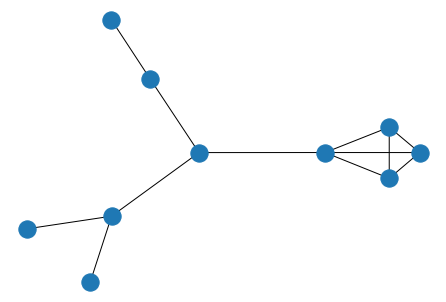

In [203]:
nx.draw(G)

In [204]:
adjacency_mat = nx.adjacency_matrix(G)
adjacency_mat.shape

(10, 10)

In [205]:
N_nodes = 10

triples = []
occurance_list =[]
for i in tqdm(range(N_nodes)):
    for j in range(i+1, N_nodes):
        for k in range(j+1, N_nodes):
            
            IJ = adjacency_mat[i, j]
            JK = adjacency_mat[j, k]
            IK = adjacency_mat[i, k]
            
            
            if (IJ + JK + IK) == 2:
                triples.append((i+1,j+1,k+1))
                occurance_list.append(i+1)
                occurance_list.append(j+1)
                occurance_list.append(k+1)
                    


In [206]:
occurances = Counter(occurance_list)
occurances

Counter({1: 2, 2: 2, 3: 5, 4: 9, 5: 3, 7: 5, 6: 1, 8: 1, 9: 1, 10: 1})

In [243]:
indices_to_remove = set()
for tup in tqdm(triples):
    ind_i = tup[0]
    ind_j = tup[1]
    ind_k = tup[2]
    
    ind_and_count = [(ind_i, occurances[ind_i]), (ind_j, occurances[ind_j]), (ind_k, occurances[ind_k])]
    max_term = max(ind_and_count, key=lambda x:x[1])
    
#     print(ind_and_count)
#     print(max_term)
    
    indices_to_remove.add(max_term[0])

In [208]:
indices_to_remove

{3, 4}

In [209]:
triples

[(1, 2, 3),
 (1, 3, 4),
 (2, 3, 4),
 (3, 4, 5),
 (3, 4, 7),
 (4, 5, 6),
 (4, 5, 7),
 (4, 7, 8),
 (4, 7, 9),
 (4, 7, 10)]

In [ ]:
adjacency_mat[1,7]

In [77]:
adjacency_mat[1,7]

0.0